## Cloning Git Repo

In [1]:
!git clone https://github.com/mkthoma/grad_CAM_cifar10.git

Cloning into 'grad_CAM_cifar10'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 54 (delta 19), reused 46 (delta 14), pack-reused 0
Receiving objects: 100% (54/54), 22.40 KiB | 3.20 MiB/s, done.
Resolving deltas: 100% (19/19), done.


## Installing dependancies

In [2]:
!pip install albumentations
!pip install grad-cam
!pip install torchsummary
!pip install torch-lr-finder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 19.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38247 sha256=639a0310a78b7faafeb467e1f965447863523e5ab511aa3bd38df9b4fc5c3d08
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


## Importing libraries

In [3]:
from __future__ import print_function
import torch
import torch.optim as optim
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch.nn as nn
from grad_CAM_cifar10.models.resnet import ResNet18
from grad_CAM_cifar10.utils import *
from grad_CAM_cifar10.main import *

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Selecting device as CUDA

In [4]:
device = select_cuda()

Device used:  cuda


## Download CIFAR10 data and apply augmentations

In [5]:
train_data, test_data, train_loader, test_loader, classes = download_data()

100%|██████████| 170498071/170498071 [00:03<00:00, 43505936.63it/s]


Extracting /root/data/cifar10/cifar-10-python.tar.gz to /root/data/cifar10


/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Unique classes of images are: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#Analyizing data

### Random images

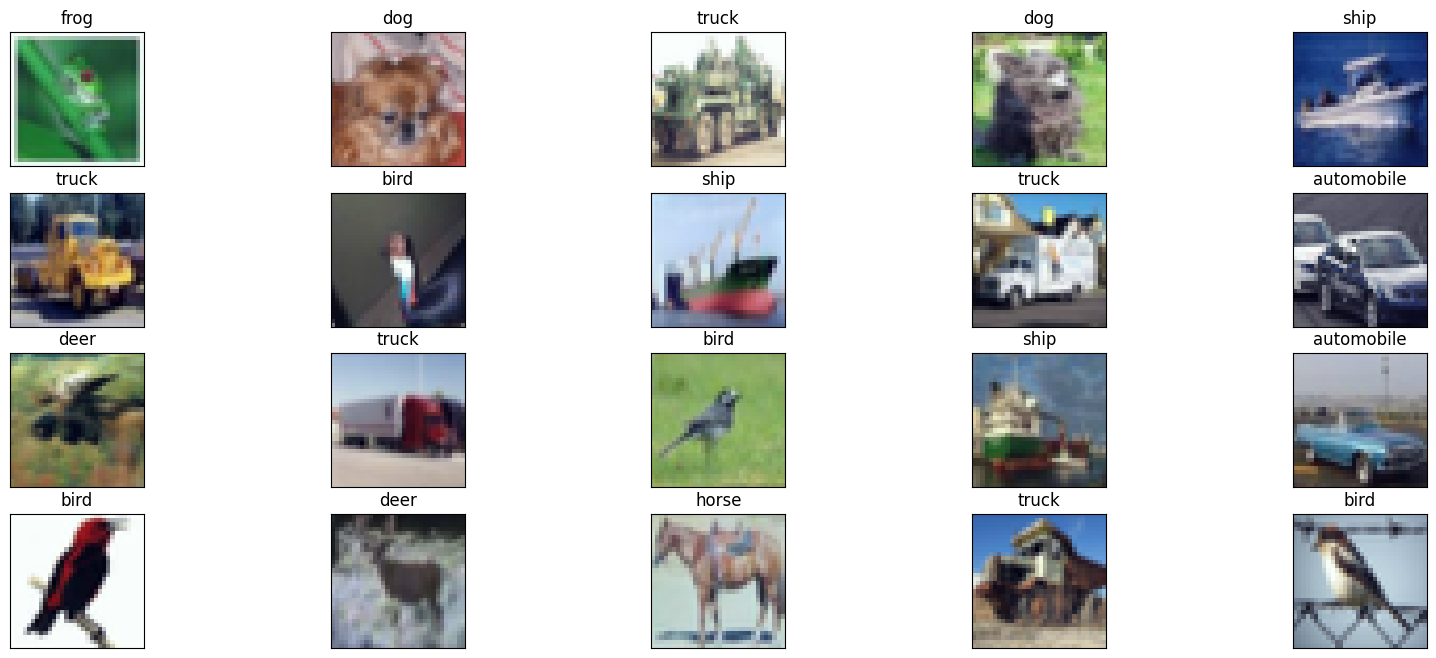

In [6]:
show_random_samples(test_loader, classes)

### Images with transformations applied

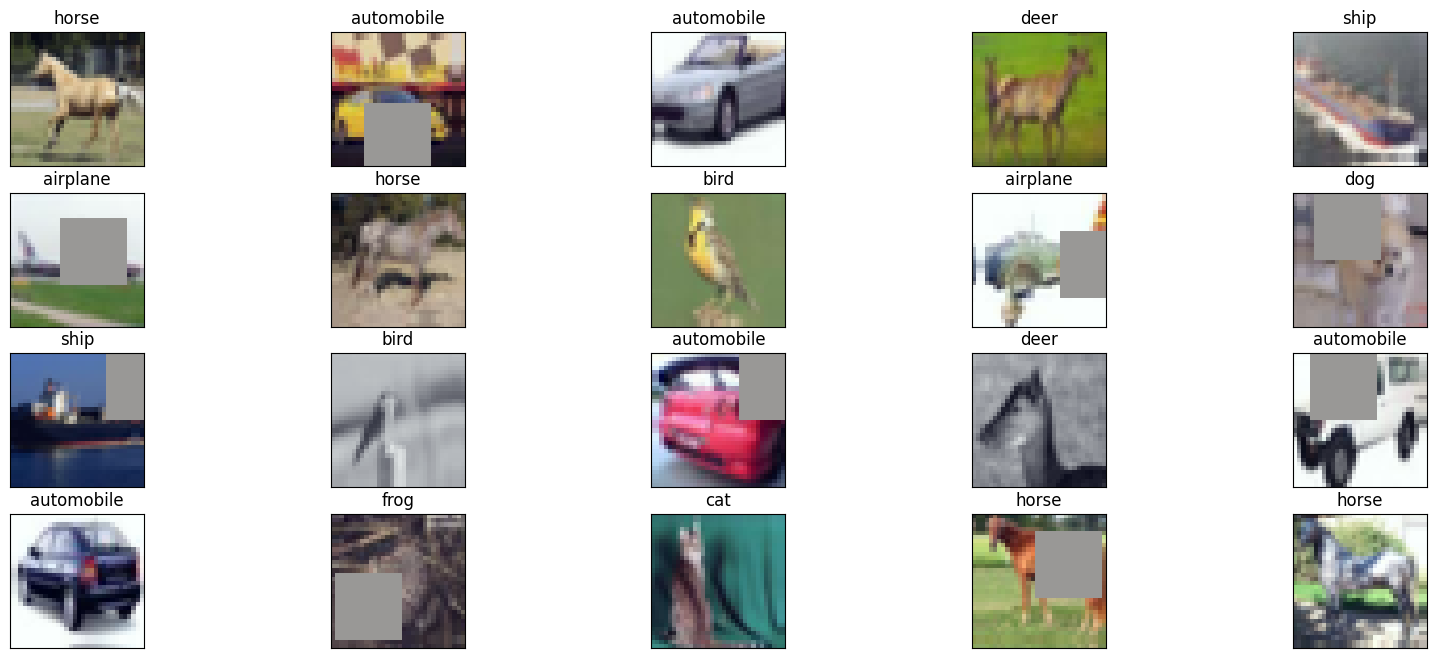

In [7]:
show_random_samples(train_loader, classes)

### Images from each class

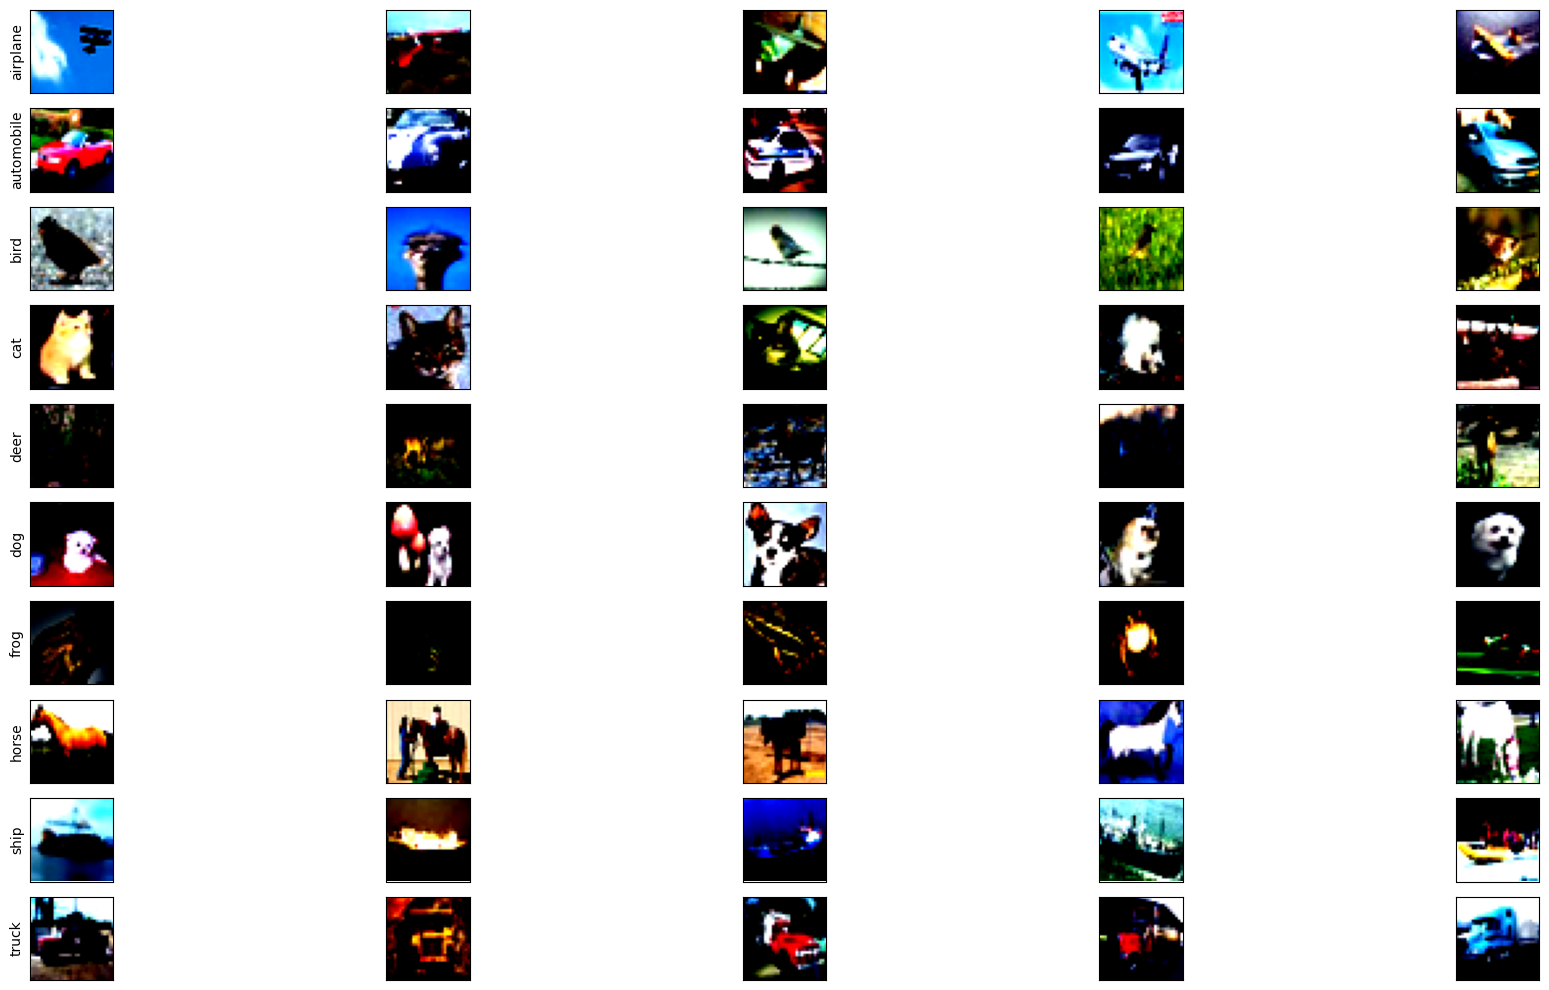

In [8]:
show_class_samples(test_loader, classes)

### RGB channels of one image

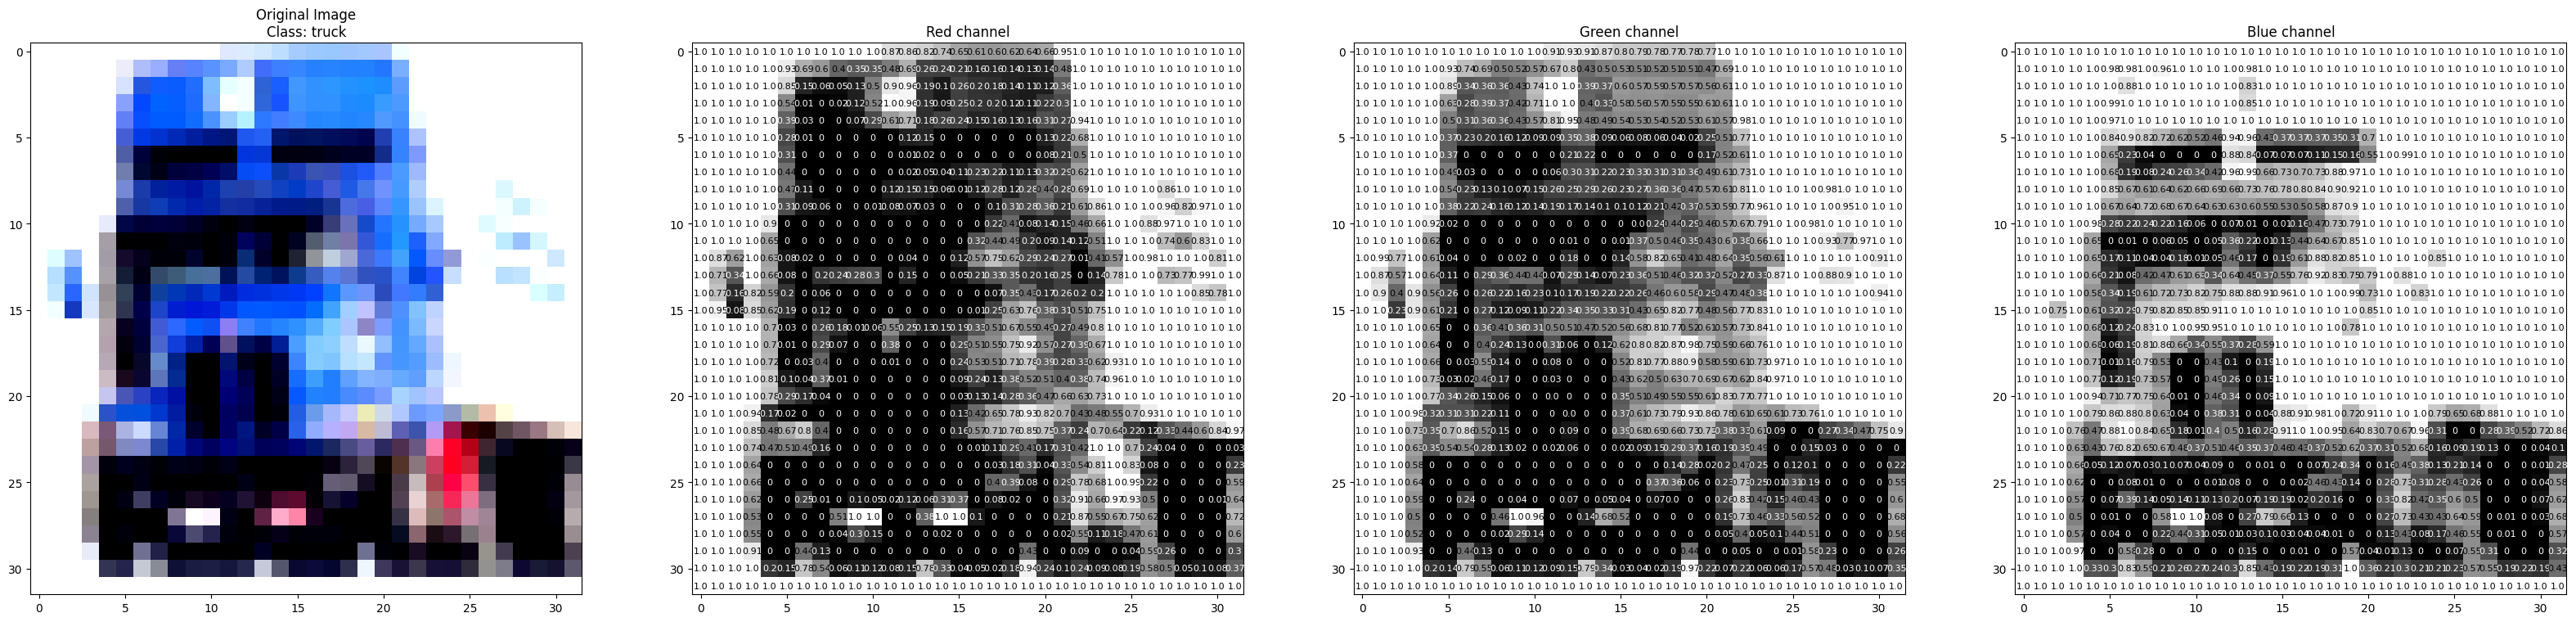

In [9]:
show_image_rgb(test_loader, classes)

## Selecting model

In [10]:
model = select_model(device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

## Finding max LR

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.00E-01


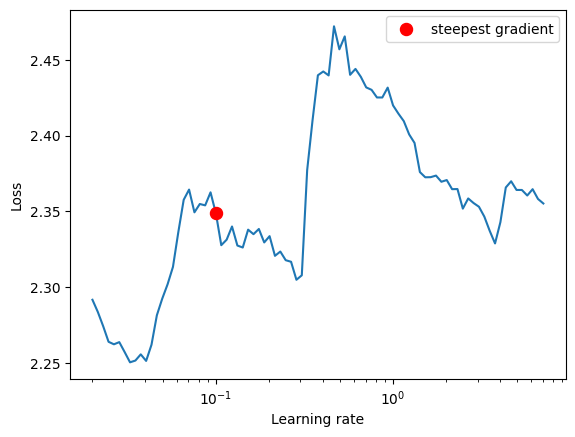

In [11]:
max_LR = max_lr(model, train_loader)

## Applying model to data for train and testing

In [12]:
train_test_loop(model, device, train_loader, test_loader, max_LR, optimizer=optim.SGD(model.parameters(), lr=0.01, momentum=0.9), criterion=nn.CrossEntropyLoss(), EPOCHS=20)

EPOCH: 1


Batch_id=390: 100%|██████████| 391/391 [00:44<00:00,  8.83it/s]


Train Average Loss: 1.5696
Train Accuracy: 42.86%
Maximum Learning Rate:  0.020810133060388942
Test Average loss: 1.6048
Test Accuracy: 46.46%


EPOCH: 2


Batch_id=390: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]


Train Average Loss: 1.1148
Train Accuracy: 60.95%
Maximum Learning Rate:  0.04062026612077788
Test Average loss: 0.9438
Test Accuracy: 69.57%


EPOCH: 3


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]


Train Average Loss: 0.8639
Train Accuracy: 69.76%
Maximum Learning Rate:  0.06043039918116682
Test Average loss: 0.8709
Test Accuracy: 71.30%


EPOCH: 4


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]


Train Average Loss: 0.7186
Train Accuracy: 75.04%
Maximum Learning Rate:  0.08024053224155576
Test Average loss: 0.7178
Test Accuracy: 75.88%


EPOCH: 5


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]


Train Average Loss: 0.6185
Train Accuracy: 78.57%
Maximum Learning Rate:  0.09998295140664959
Test Average loss: 0.6169
Test Accuracy: 78.59%


EPOCH: 6


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]


Train Average Loss: 0.5472
Train Accuracy: 81.01%
Maximum Learning Rate:  0.0933169514066496
Test Average loss: 0.5688
Test Accuracy: 81.47%


EPOCH: 7


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]


Train Average Loss: 0.4827
Train Accuracy: 83.35%
Maximum Learning Rate:  0.08665095140664959
Test Average loss: 0.5410
Test Accuracy: 82.28%


EPOCH: 8


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.44it/s]


Train Average Loss: 0.4311
Train Accuracy: 85.01%
Maximum Learning Rate:  0.0799849514066496
Test Average loss: 0.4472
Test Accuracy: 84.29%


EPOCH: 9


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]


Train Average Loss: 0.3845
Train Accuracy: 86.53%
Maximum Learning Rate:  0.0733189514066496
Test Average loss: 0.5039
Test Accuracy: 83.80%


EPOCH: 10


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]


Train Average Loss: 0.3541
Train Accuracy: 87.53%
Maximum Learning Rate:  0.0666529514066496
Test Average loss: 0.4157
Test Accuracy: 86.83%


EPOCH: 11


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]


Train Average Loss: 0.3142
Train Accuracy: 89.04%
Maximum Learning Rate:  0.059986951406649607
Test Average loss: 0.4200
Test Accuracy: 86.16%


EPOCH: 12


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]


Train Average Loss: 0.2864
Train Accuracy: 89.74%
Maximum Learning Rate:  0.0533209514066496
Test Average loss: 0.3720
Test Accuracy: 88.05%


EPOCH: 13


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]


Train Average Loss: 0.2631
Train Accuracy: 90.73%
Maximum Learning Rate:  0.046654951406649596
Test Average loss: 0.3650
Test Accuracy: 88.50%


EPOCH: 14


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]


Train Average Loss: 0.2342
Train Accuracy: 91.63%
Maximum Learning Rate:  0.039988951406649605
Test Average loss: 0.3853
Test Accuracy: 88.53%


EPOCH: 15


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s]


Train Average Loss: 0.2140
Train Accuracy: 92.41%
Maximum Learning Rate:  0.033322951406649606
Test Average loss: 0.3443
Test Accuracy: 89.61%


EPOCH: 16


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]


Train Average Loss: 0.1864
Train Accuracy: 93.27%
Maximum Learning Rate:  0.0266569514066496
Test Average loss: 0.3329
Test Accuracy: 90.11%


EPOCH: 17


Batch_id=390: 100%|██████████| 391/391 [00:45<00:00,  8.51it/s]


Train Average Loss: 0.1652
Train Accuracy: 94.32%
Maximum Learning Rate:  0.01999095140664961
Test Average loss: 0.3370
Test Accuracy: 90.44%


EPOCH: 18


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]


Train Average Loss: 0.1412
Train Accuracy: 94.96%
Maximum Learning Rate:  0.013324951406649618
Test Average loss: 0.3231
Test Accuracy: 90.80%


EPOCH: 19


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.44it/s]


Train Average Loss: 0.1191
Train Accuracy: 95.90%
Maximum Learning Rate:  0.006658951406649613
Test Average loss: 0.3132
Test Accuracy: 91.43%


EPOCH: 20


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s]


Train Average Loss: 0.0979
Train Accuracy: 96.59%
Maximum Learning Rate:  -7.048593350378329e-06
Test Average loss: 0.3175
Test Accuracy: 91.50%




## Training/Testing loss and accuracies

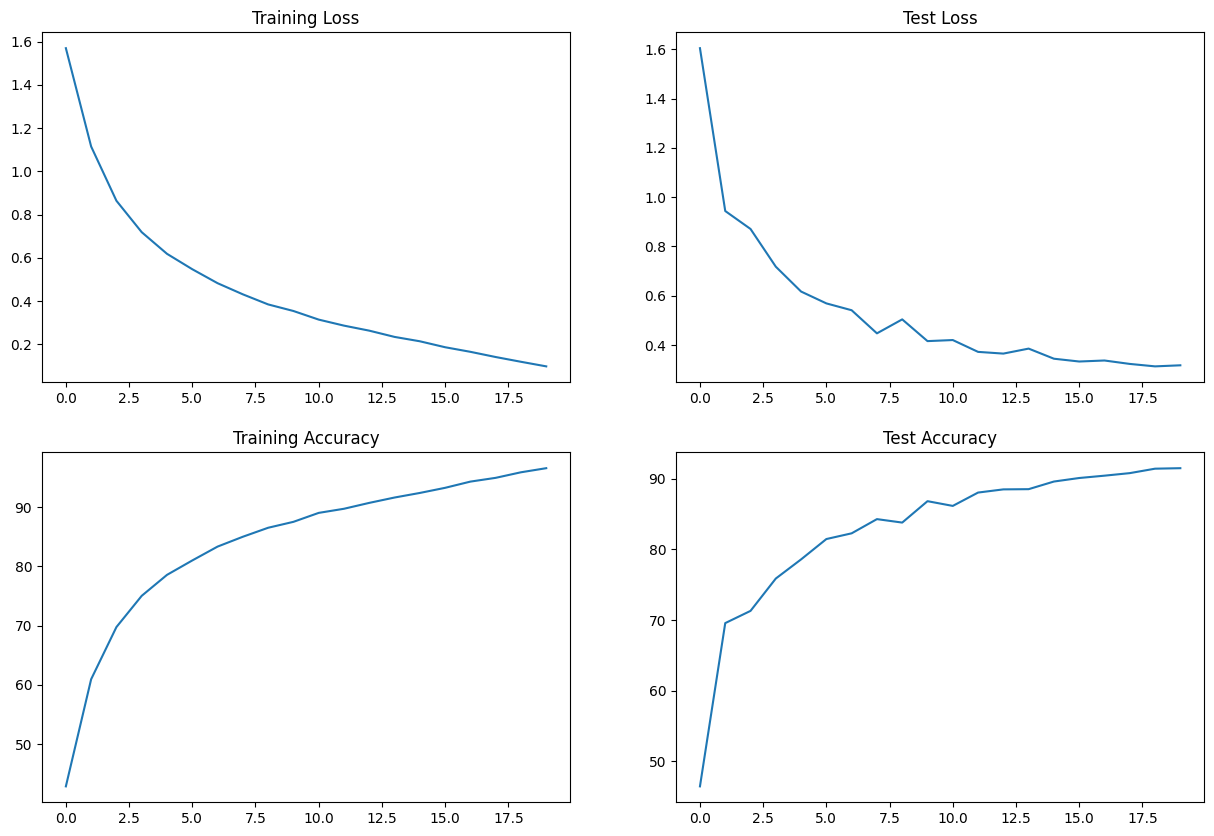

In [13]:
show_accuracy_loss(train_losses, train_accuracies, test_losses, test_accuracies)

## Plotting misclassified images

Misclassified images



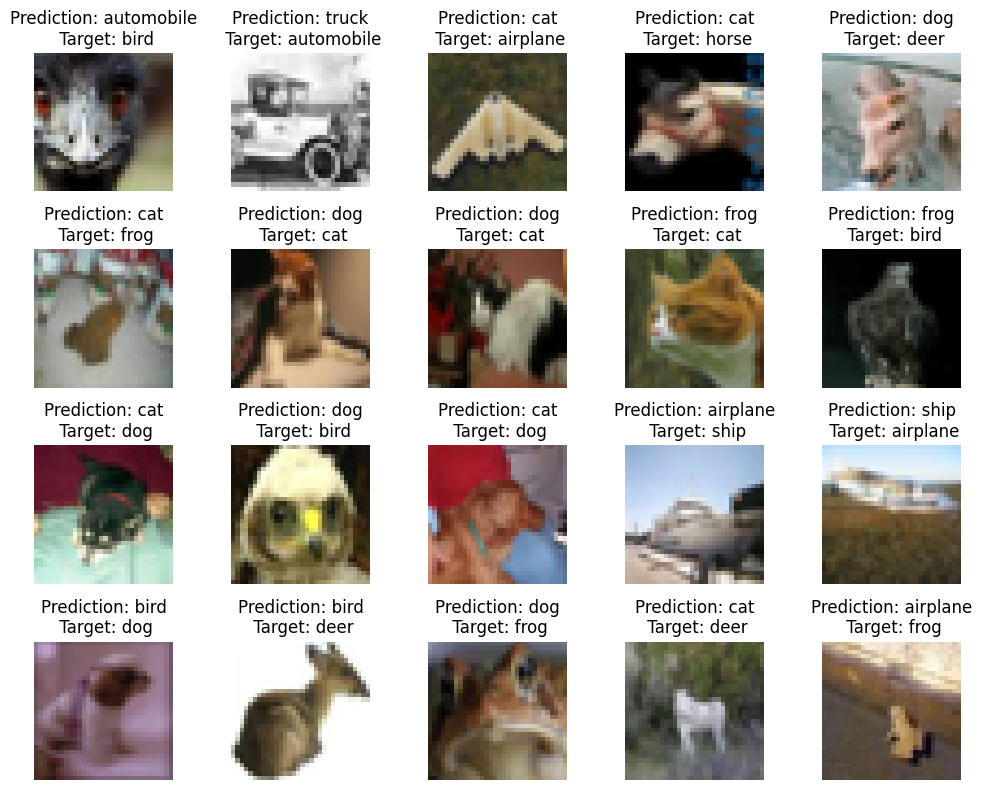



Misclassified images using GradCAM



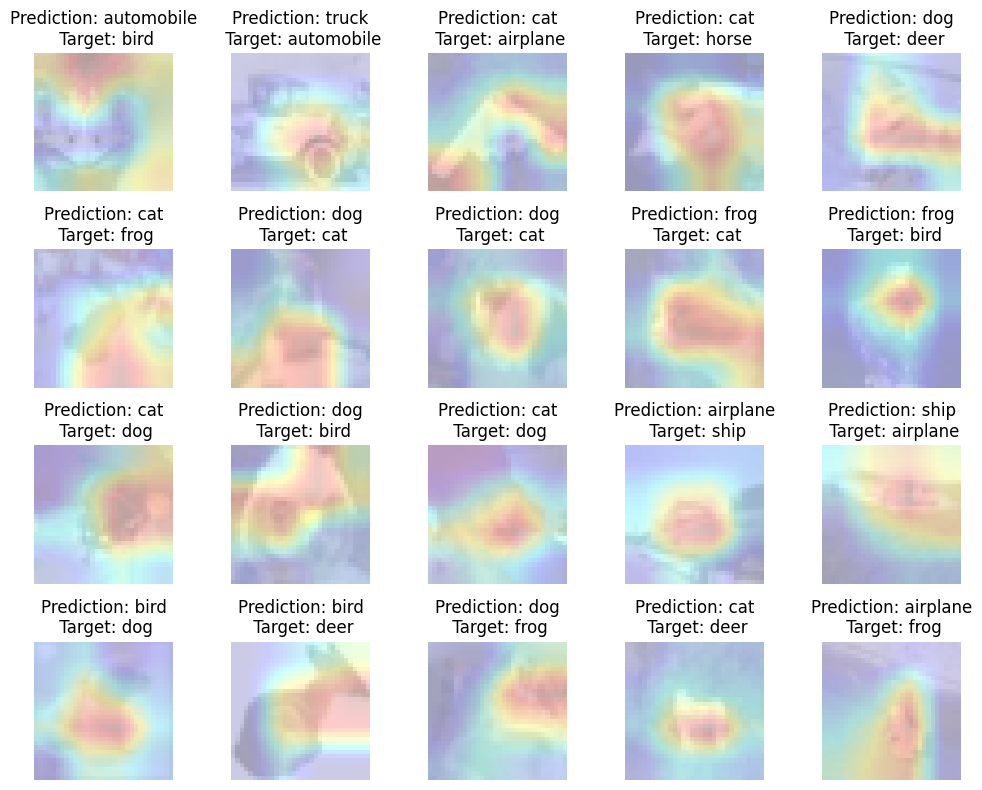

In [14]:
plot_misclassified(model, test_loader, classes, device, no_misclf=20, plot_size=(4,5), grad_CAM=True)